In [1]:
import cv2
import numpy as np
import datetime
import dlib #얼굴탐색
from keras.models import load_model
from imutils import face_utils #imutils:OpenCV가 제공하는 기능 중에 좀 복잡하고 사용성이 떨어지는 부분을 잘 보완해 주는 패키지
import matplotlib.pyplot as plt 

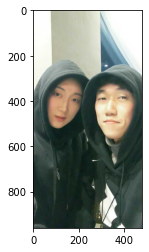

In [2]:
img = cv2.imread('./image/test.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
#얼굴 찾기 호출
#dlib.get_frontal_face_detector()로 생성된 
#기본 face_detecor 객체는 dlib.fhog_object_detector 객체다.
detector = dlib.get_frontal_face_detector()

#다운 받은 shape_predictor_68_face_landmarks.dat 불러오기
predictor = dlib.shape_predictor('./face_data/shape_predictor_68_face_landmarks.dat')

#다운 받은 dlib_face_recognition_resnet_model_v1.dat 불러오기
facerec = dlib.face_recognition_model_v1('./face_data/dlib_face_recognition_resnet_model_v1.dat')

In [4]:
#얼굴 찾기
dets = detector(img,1)

In [5]:
faces = []#얼굴이미지 넣을 곳

for k,d in enumerate(dets):
    #찾은 얼굴 사각형 프레임씌우기
#     find_face_frame = cv2.rectangle(img, (d.left(), d.top()), (d.right(), d.bottom()), (255,0,0), 3)
    # d.bottom - d.top  = x축, d.right - d.left = y축
    face = img[d.top():d.bottom(),d.left():d.right()] #xy축 ,로 구분
    print(face)
    faces.append(face)

[[[ 38  60  57]
  [ 36  58  55]
  [ 34  56  53]
  ...
  [ 94 111 105]
  [ 83 100  94]
  [ 65  82  76]]

 [[ 37  59  56]
  [ 35  57  54]
  [ 34  56  53]
  ...
  [ 96 113 107]
  [ 89 106 100]
  [ 73  90  84]]

 [[ 36  58  55]
  [ 35  57  54]
  [ 34  56  53]
  ...
  [ 97 114 108]
  [ 93 110 104]
  [ 79  96  90]]

 ...

 [[ 36  46  38]
  [ 31  42  36]
  [ 47  58  52]
  ...
  [ 32  48  45]
  [ 28  44  41]
  [ 26  42  39]]

 [[ 43  50  43]
  [ 46  56  48]
  [ 43  53  45]
  ...
  [ 29  46  40]
  [ 25  42  36]
  [ 23  40  34]]

 [[ 46  53  45]
  [ 55  65  57]
  [ 38  48  40]
  ...
  [ 25  42  36]
  [ 21  38  32]
  [ 19  36  30]]]
[[[147 159 159]
  [156 168 168]
  [152 164 164]
  ...
  [ 32  47  50]
  [ 31  46  49]
  [ 29  47  51]]

 [[150 162 162]
  [157 169 169]
  [150 162 162]
  ...
  [ 32  47  50]
  [ 31  46  49]
  [ 29  47  51]]

 [[150 162 162]
  [158 170 170]
  [153 165 165]
  ...
  [ 32  47  50]
  [ 31  46  49]
  [ 29  47  51]]

 ...

 [[ 53  70  64]
  [ 53  70  64]
  [ 54  71  65]
  ..

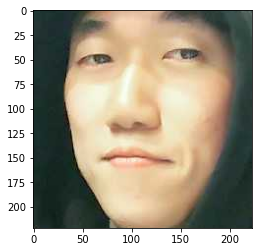

In [6]:
plt.imshow(faces[0])

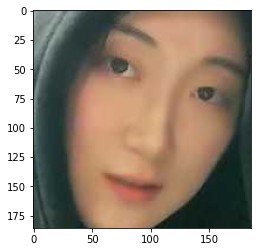

In [7]:
plt.imshow(faces[1])

In [8]:
def crop_eye(img, eye_points):
    x1, y1 = np.amin(eye_points, axis=0)
    x2, y2 = np.amax(eye_points, axis=0)
    cx, cy = (x1 + x2) / 2, (y1 + y2) / 2 #중앙

    w = (x2 - x1) * 1.2
    h = w * 26 / 34

    margin_x, margin_y = w / 2, h / 2

    min_x, min_y = int(cx - margin_x), int(cy - margin_y)
    max_x, max_y = int(cx + margin_x), int(cy + margin_y)

    eye_rect = np.rint([min_x, min_y, max_x, max_y]).astype(np.int)

    eye_img = gray[eye_rect[1]:eye_rect[3], eye_rect[0]:eye_rect[2]]
    
    print(eye_rect)
    print(eye_img)
    return eye_img, eye_rect

In [9]:
model = load_model('datas/models/left_eye.h5')

[288 376 327 406]
[[170 175 182 ... 183 181 180]
 [174 179 185 ... 183 182 180]
 [179 184 189 ... 183 182 181]
 ...
 [194 195 195 ... 211 211 211]
 [200 200 200 ... 213 212 211]
 [203 203 203 ... 214 213 212]]
[370 370 415 404]
[[193 193 194 ... 152 152 152]
 [195 195 196 ... 151 150 150]
 [196 196 197 ... 149 148 147]
 ...
 [213 214 214 ... 188 187 187]
 [213 214 214 ... 194 194 193]
 [212 213 214 ... 198 197 196]]
[[0.99890924]] [[0.8926835]]
[ 89 361 127 389]
[[ 71  69  70 ... 157 157 158]
 [ 70  70  70 ... 158 159 159]
 [ 70  70  71 ... 158 159 160]
 ...
 [153 153 153 ... 136 136 144]
 [156 156 156 ... 145 146 151]
 [160 160 160 ... 150 151 154]]
[166 383 199 409]
[[140 140 139 140 140 142 143 144 145 145 150 150 149 149 148 147 147 146
  147 146 144 141 139 136 134 133 133 132 129 126 122 118 116]
 [140 141 144 144 144 144 144 144 144 144 152 151 151 150 148 147 147 146
  143 142 140 138 136 134 132 131 135 133 130 126 122 118 115]
 [140 141 144 144 144 145 145 146 146 146 147 146

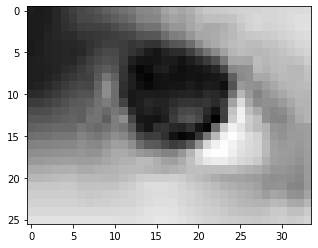

In [10]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

faces = detector(gray)

for face in faces:
    shapes = predictor(gray, face)
    shapes = face_utils.shape_to_np(shapes)

    eye_img_l, eye_rect_l = crop_eye(gray, eye_points=shapes[36:42]) #왼쪽 눈 위치정보
    eye_img_r, eye_rect_r = crop_eye(gray, eye_points=shapes[42:48]) #오른쪽 눈 위치정보

    eye_img_l = cv2.resize(eye_img_l, dsize=(34,26)) #dsize : 결과 이미지 크기
    eye_img_r = cv2.resize(eye_img_r, dsize=(34,26))
    eye_img_r = cv2.flip(eye_img_r, flipCode=1)

    plt.imshow(eye_img_l, cmap='gray')
    
    eye_input_l = eye_img_l.copy().reshape((1, 26, 34, 1)).astype(np.float32) / 255.
    eye_input_r = eye_img_r.copy().reshape((1, 26, 34, 1)).astype(np.float32) / 255.

    pred_l = model.predict(eye_input_l)
    pred_r = model.predict(eye_input_r)
    
    print(pred_l, pred_r)
    
    state_l = 'O %.1f' if pred_l > 0.1 else '- %.1f'
    state_r = 'O %.1f' if pred_r > 0.1 else '- %.1f'

    state_l = state_l % pred_l
    state_r = state_r % pred_r

    cv2.rectangle(img, pt1=tuple(eye_rect_l[0:2]), pt2=tuple(eye_rect_l[2:4]), color=(255,255,255), thickness=2)
    cv2.rectangle(img, pt1=tuple(eye_rect_r[0:2]), pt2=tuple(eye_rect_r[2:4]), color=(255,255,255), thickness=2)

    cv2.putText(img, state_l, tuple(eye_rect_l[0:2]), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)
    cv2.putText(img, state_r, tuple(eye_rect_r[0:2]), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)

In [11]:
cv2.imwrite('./test.jpg', img)

True